<a href="https://colab.research.google.com/github/Zack-Odhis/Capstone-project/blob/main/Copy_of_the_impact_of_lifestyle_choices_on_student_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to this project where we explore the relationship between students’ daily habits and their academic performance.
Today's students juggle study time, screen time, sleep, diet, and social life, all of which can influence how well they perform in school. The goal of this project is to analyze and predict exam scores based on lifestyle factors such as study hours, social media usage, sleep duration, mental health, and more.
By the end of this notebook, we aim to answer: **What habits most strongly influence student academic performance?** And can we use them to make reliable predictions?

# **Task 1. Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

**i. load and explore the dataset**


In [ ]:
#show current working directory
import os
print("Current Directory", os.getcwd())
print("files in this directory:", os.listdir())

Current Directory /content
files in this directory: ['.config', 'student_habits_performance.csv', 'sample_data']


In [ ]:
# Load the dataset
df = pd.read_csv('student_habits_performance.csv')

# Preview the first few rows
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
#preview the last few rows
df.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [ ]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Data types and non-null counts
print("\nData info:")
df.info()

# Summary statistics (numerical features)
print("\nSummary statistics:")
df.describe()

Shape of the dataset: (1000, 16)

Missing values:
 student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


**ii. Data Visualization**

This helps spot outliers. for example, students who study zero hours and still score high. it also checks for skewness, which might affect my model of choice. Moreover, this visualization identify weird clusters and helps understand range and spread.

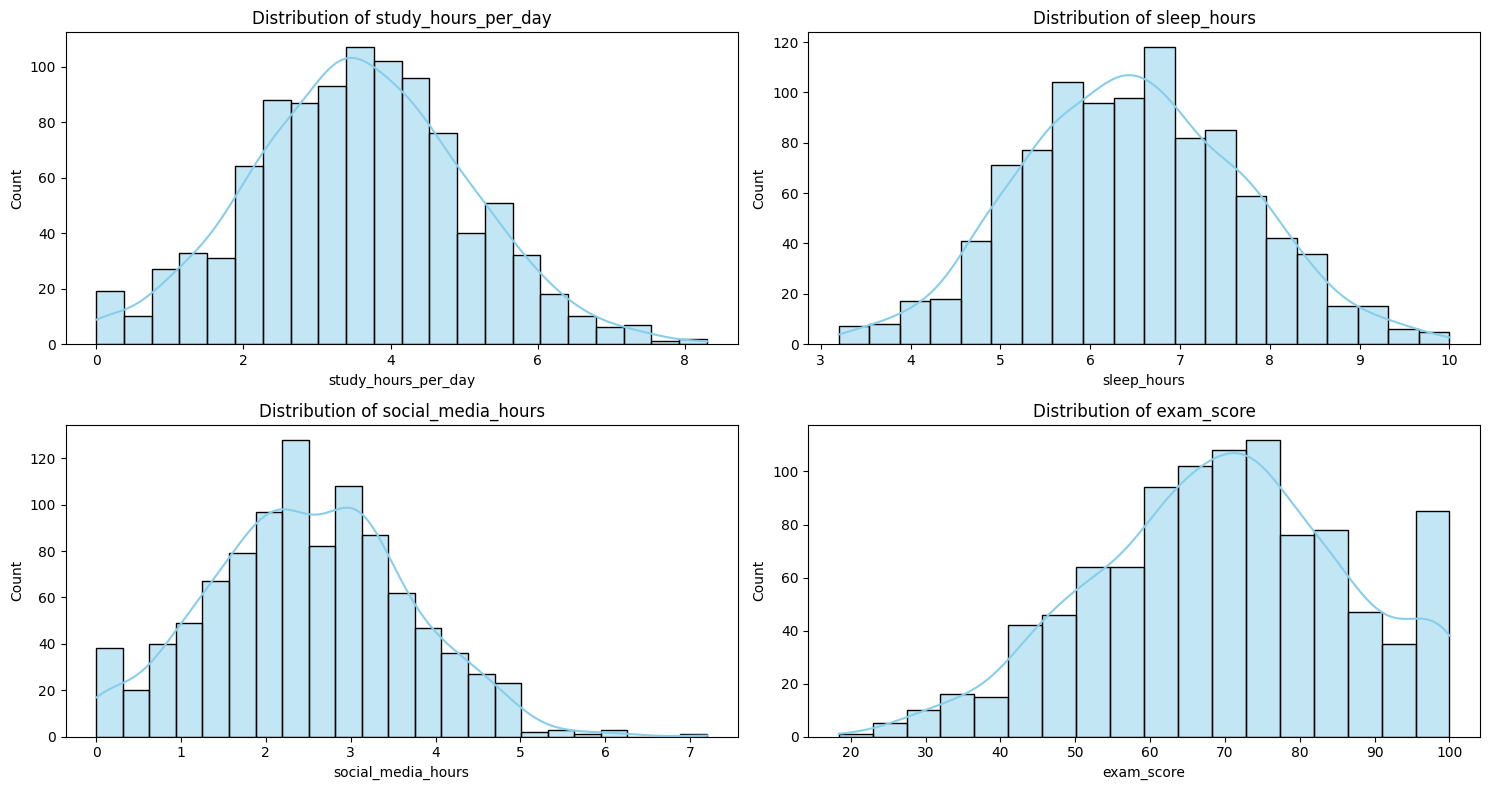

In [ ]:
# Quick histograms for key features
num_features = ['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'exam_score']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

**iii. Correlation analysis**

this measures the statistical relationship between two variables, and will help us answer questions like do students who study more score higher, or does excessive social media use lower exams scores, or whether sleep duration is linked to perfomance.

In [ ]:
# Select numerical columns for correlation
num_cols = ['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'netflix_hours', 'exam_score']
corr_matrix = df[num_cols].corr()

# Display the matrix
print(corr_matrix)

                     study_hours_per_day  sleep_hours  social_media_hours  \
study_hours_per_day             1.000000    -0.027757            0.020282   
sleep_hours                    -0.027757     1.000000            0.018236   
social_media_hours              0.020282     0.018236            1.000000   
netflix_hours                  -0.031158    -0.000935            0.011477   
exam_score                      0.825419     0.121683           -0.166733   

                     netflix_hours  exam_score  
study_hours_per_day      -0.031158    0.825419  
sleep_hours              -0.000935    0.121683  
social_media_hours        0.011477   -0.166733  
netflix_hours             1.000000   -0.171779  
exam_score               -0.171779    1.000000  


**2. Preprocessing the data**

In [ ]:
#impute missing values
#remeber only the parental_education_level column had missing values
print(df['parental_education_level'].value_counts(normalize=True))

parental_education_level
High School    0.431243
Bachelor       0.385039
Master         0.183718
Name: proportion, dtype: float64


In [ ]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [ ]:
print(df['parental_education_level'].isnull().sum())

0


In [ ]:
#fix data types
#First, we'll be converting yes/no columns to binary
binary_map = {'Yes': 1, 'No': 0}
df['part_time_job'] = df['part_time_job'].map(binary_map)
df['extracurricular_participation'] = df['extracurricular_participation'].map(binary_map)

In [ ]:
#next, converting ordinal columns to numbers
diet_map = {'Poor': 0, 'Fair': 1, 'Good': 2}
df['diet_quality'] = df['diet_quality'].map(diet_map)

In [ ]:
internet_map = {'Poor': 0, 'Average': 1, 'Good': 2}
df['internet_quality'] = df['internet_quality'].map(internet_map)

In [ ]:
education_map = {'High School': 0, 'Bachelor': 1, 'Master': 2}
df['parental_education_level'] = df['parental_education_level'].map(education_map)

In [ ]:
#one-hot encode for gender
#this is necessary because asigning
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [ ]:
#Drop student_id
df.drop('student_id', axis=1, inplace=True)

In [ ]:
#confirm all object types are handled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   study_hours_per_day            1000 non-null   float64
 2   social_media_hours             1000 non-null   float64
 3   netflix_hours                  1000 non-null   float64
 4   part_time_job                  1000 non-null   int64  
 5   attendance_percentage          1000 non-null   float64
 6   sleep_hours                    1000 non-null   float64
 7   diet_quality                   1000 non-null   int64  
 8   exercise_frequency             1000 non-null   int64  
 9   parental_education_level       1000 non-null   int64  
 10  internet_quality               1000 non-null   int64  
 11  mental_health_rating           1000 non-null   int64  
 12  extracurricular_participation  1000 non-null   in

Since I am trying to predict an exam_score, which is a continous numerical value (from 0-100). I will be using linear regression. Hence, I will scale my numerical features

In [ ]:
num_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
            'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

# **Step 2. Training a LInear Regression Model**


In [ ]:
# Define X and y
X = df.drop('exam_score', axis=1)
y = df['exam_score']

In [ ]:
#Splitting the data into training set (80%), and Test set (20%).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#training the linear regression model
#initialize and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#making predictions and evaluating

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 5.09
R² Score: 0.90


At this point, I am trying to visualize the actual and predicted exam sccores, and see how close my model predictions are to reality. This is part of evaluating and finalizing my linear regression.

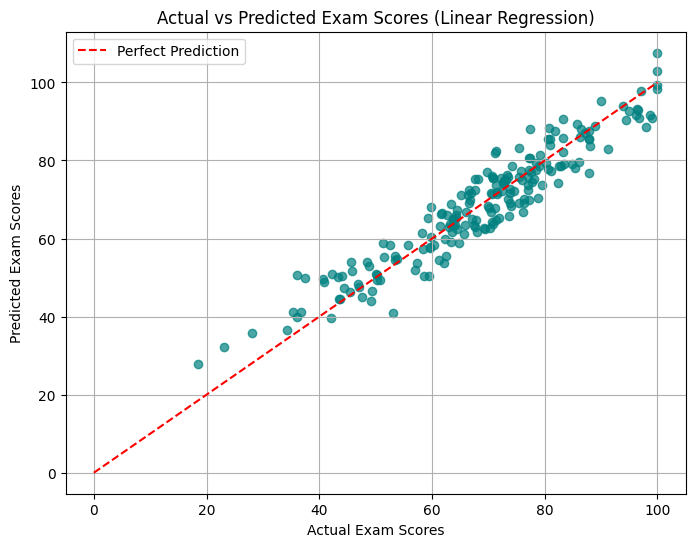

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([0, 100], [0, 100], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

In the visualization above, the dots represent the actual exam scores. the dots above the perfect prediction line are overpredicted while those below it are underpredicted. However, since the model's spread shows an RMSE of 5 points, the scatter is expected. Nevertheless, the Actual vs Predicted plot for our Linear Regression model shows a strong alignment with the ideal prediction line. Most predictions fall close to the 45° reference, suggesting the model is accurately estimating exam scores

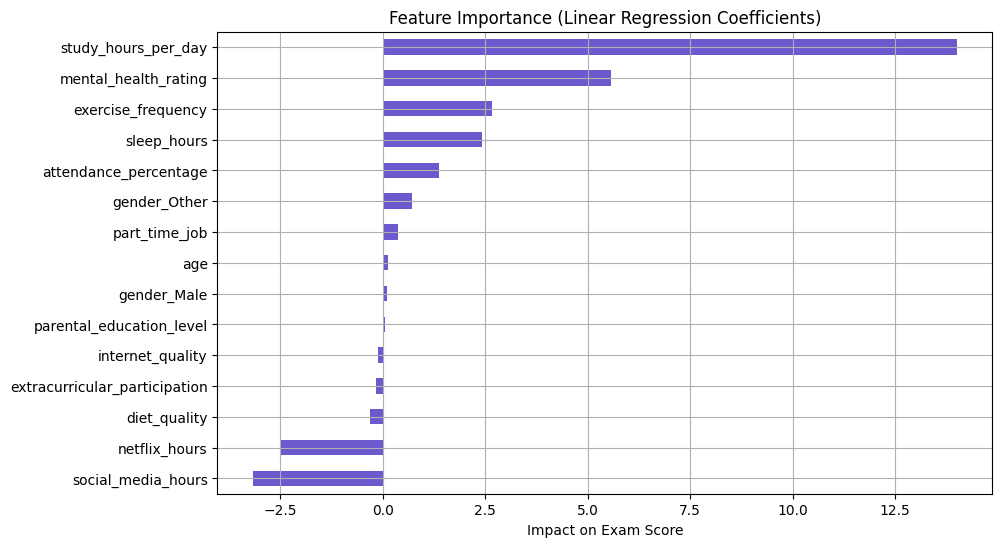

In [ ]:
#looking at feature importance
#get coefficient and match them to features
coefficients = pd.Series(model.coef_, index=X.columns).sort_values()

# Plot
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='slateblue')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Impact on Exam Score")
plt.grid(True)
plt.show()

In the visualization above, given our scaled features pitting all inputs into the same scale, meaning that the size of each coefficient directly shows how important the variable is to the prediction, study hours per day is by far the most positively inlfuential habit. In its interpretation, for each standard deviation increase in study time, exam scores increased by almost 14 points. clearly supporting the common idea that more studying leads to better academic perfomance - common sense now backed by data. Also, social media usage has the strongest negative impact on exams scores, suggesting that heavy social media use is distracting and cuts into study time and rest.

# **Step 3.Train a Random Forest Model for Comparison**

In [ ]:
#start by training the model

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train on the same training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#next, we make predictions and evaluate

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")

Random Forest RMSE: 6.25
Random Forest R² Score: 0.85


**Performance Comparison:**

Linear Regression

RMSE: 5.09
R² Score: 0.90

Random Forest Regressor

RMSE: 6.25
R² Score: 0.85

The linear regression model outperformed the Random Forest on the test data:

Lower RMSE (5.09 vs. 6.25 → Linear regression predictions are ~1.16 points closer to actual values on average).

Higher R² (0.90 vs. 0.85 → Linear regression explains 5% more variance in exam scores).

Why Linear Regression Won:

The data likely has:

Linear relationships between features and exam_score (since linear models work best when the true relationship is linear).

Minimal complex interactions between features (which Random Forest specializes in detecting).

Possible overfitting in the Random Forest (though less common with default hyperparameters).